In [4]:
import numpy as np
import random
import math
import matplotlib
import matplotlib.pyplot as plt
import heapq

In [15]:
# Initial conditions
n = 100 # number of trash
m = 5 # size of grid
k = 6 # number of agents
mu = [3, 2] # center of trash pile
sig = [[0.1, 0], [0, 0.1]] # spread of pile
var = 0.1 # error in measurements

field = np.zeros((m,m))# array of trash pieces dispersed on field
visits = np.zeros((k,m,m))# array to track number of visits to each gridpoint
reward = np.zeros((k,m,m))# array of sum of rewards from each gridpoint
expected_mean = np.zeros((k,m,m)) # array of expected mean of each gridpoint

T = n # number of time steps
delta = 1 # amount reward decreases per visit
xi = 2 # constant xi > 1
gamma = 3 # max message length

messageSent = {}# dict {agent: list of messages to send - tuple [agent, time, arm, reward]}
messageRec = {}# dict {agent: list of messages received - tuple [agent, time, arm, reward]}

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. 21. 26.  0.  0.]
 [ 0. 31. 22.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
Degree: 0
Total time: 56
[[  0.   0.   0.   0.   0.   0.   0.   4.   4.   4.   4.   8.  17.  17.
   35.  35.  41.  41.  41.  41.  48.  48.  62.  62.  62.  69.  69.  69.
   77.  77.  88.  88.  98. 108. 108. 108. 116. 116. 123. 123. 129. 135.
  135. 135. 139. 143. 143. 146. 149. 149. 151. 153. 153. 154. 155. 155.]
 [  0.   0.   0.   0.   0.   0.   2.  10.  10.  10.  13.  13.  13.  17.
   17.  31.  31.  36.  36.  36.  42.  42.  42.  49.  56.  56.  56.  60.
   60.  62.  62.  63.  63.  63.  63.  63.  63.  63.  63.  63.  63.  63.
   63.  63.  63.  63.  63.  63.  63.  63.  63.  63.  63.  63.  63.  63.]
 [  0.   0.   1.   1.   1.   4.   4.   4.   9.   9.   9.  15.  15.  15.
   21.  21.  21.  28.  28.  28.  32.  32.  32.  32.  32.  32.  32.  32.
   32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.
   32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32

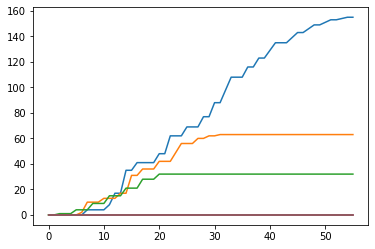

Degree: 1
Total time: 52
[[  0.   0.   0.   0.   0.   0.   4.   4.   4.   4.   9.   9.  19.  19.
   19.  25.  25.  25.  25.  31.  31.  45.  45.  53.  53.  53.  61.  61.
   61.  61.  69.  79.  79.  79.  87.  87.  87.  93.  99.  99. 104. 104.
  108. 108. 111. 111. 113. 115. 115. 116. 117. 117.]
 [  0.   0.   0.   0.   0.   3.   3.  10.  10.  10.  13.  13.  13.  17.
   17.  29.  29.  34.  34.  34.  39.  39.  39.  46.  52.  52.  52.  55.
   55.  57.  57.  57.  57.  57.  57.  57.  57.  57.  57.  57.  57.  57.
   57.  57.  57.  57.  57.  57.  57.  57.  57.  57.]
 [  0.   0.   0.   1.   1.   4.   4.   4.   9.   9.   9.   9.  15.  15.
   15.  21.  21.  21.  26.  26.  26.  28.  28.  28.  28.  28.  28.  28.
   28.  28.  28.  28.  28.  28.  28.  28.  28.  28.  28.  28.  28.  28.
   28.  28.  28.  28.  28.  28.  28.  28.  28.  28.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   

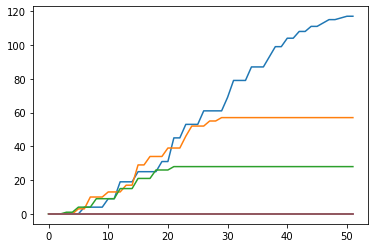

Degree: 2
Total time: 39
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.  9.  9.  9.  9.  9.  9. 20.
  20. 20. 20. 20. 20. 31. 31. 31. 31. 31. 38. 38. 38. 43. 43. 43. 46. 46.
  46. 47. 47.]
 [ 0.  0.  0.  0.  0.  0.  5.  5.  5.  5.  5. 12. 12. 12. 12. 21. 21. 21.
  21. 21. 31. 31. 31. 31. 38. 38. 38. 43. 43. 43. 46. 46. 48. 48. 48. 48.
  48. 48. 48.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0

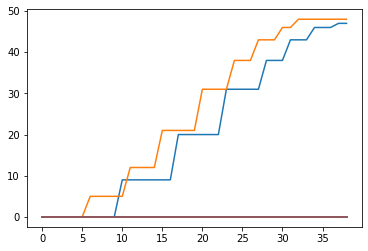

Degree: 3
Total time: 45
[[ 0.  0.  0.  0.  0.  0.  4.  4.  4.  4.  9.  9.  9.  9. 15. 15. 15. 15.
  21. 21. 21. 28. 28. 28. 36. 36. 36. 45. 45. 45. 45. 53. 53. 53. 59. 59.
  64. 64. 64. 67. 67. 69. 69. 70. 70.]
 [ 0.  0.  0.  0.  0.  3.  3.  3.  3.  5.  5.  5.  7.  7.  7.  9.  9. 13.
  13. 13. 17. 17. 17. 21. 21. 21. 23. 23. 23. 23. 23. 23. 23. 23. 23. 23.
  23. 23. 23. 23. 23. 23. 23. 23. 23.]
 [ 0.  0.  1.  1.  1.  4.  4.  4.  8.  8.  8. 13. 13. 13. 19. 19. 19. 26.
  26. 26. 30. 30. 30. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31. 31.
  31. 31. 31. 31. 31. 31. 31. 31. 31.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0

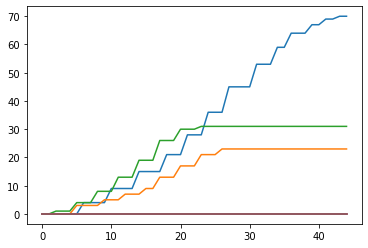

Degree: 4
Total time: 38
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10. 10. 10. 10. 10. 10. 10.
  22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 28. 28. 28. 32. 32. 32. 34. 34.
  35. 35.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]]


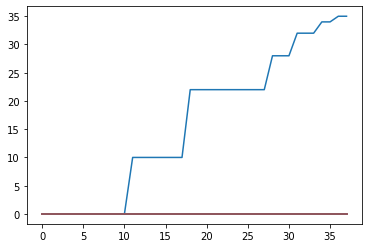

Degree: 5
Total time: 32
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


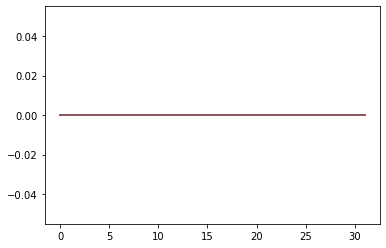

In [16]:
# Initialize field
trash = np.random.multivariate_normal(mu, sig, n)
for i in range(n):
    x = int(trash[i][0])
    y = int(trash[i][1])
    field[x][y] += 1
print(field)
    
for degree in range(k):
    print("Degree: {}".format(degree))
    # Reset matrices used for calculation 
    field_temp = field.copy()
    visits = np.zeros((k,m,m))# array to track number of visits to each gridpoint
    reward = np.zeros((k,m,m))# array of sum of rewards from each gridpoint
    expected_mean = np.zeros((k,m,m)) # array of expected mean of each gridpoint
    regret = []

    # Reset Messages
    for i in range(k):
        messageSent[i] = []
        messageRec[i] = []
        regret.append([0])

    # Initialize communication network
    graph = np.identity(k)
    if degree % 2 == 0:
        num = int(degree/2)
        for j in range(num):
            # make vertex for every (i +1) steps away
            for i in range(k):
                neighbor = int(i + j + 1)
                if neighbor > (k-1):
                    neighbor = neighbor - k
                graph[i][neighbor] = 1
                graph[neighbor][i] = 1
    else:
        num = int((degree-1)/2 + 1)
        for j in range(num):
            # make vertex for every n/2 - i steps away
            for i in range(k):
                neighbor = int(i + k/2 - j)
                if neighbor > (k-1):
                    neighbor = neighbor - k
                graph[i][neighbor] = 1
                graph[neighbor][i] = 1

    # Initialize agents
    t = 0
    for i in range(k):
        for x in range(m):
            for y in range(m):
                measure = round(np.random.normal(field_temp[x][y], var),1)
                reward[i][x][y] += measure
                visits[i][x][y] += 1

        # Calculate expected mean
        expected_mean[i] = np.divide(reward[i], visits[i])

    t += 1
    while np.max(field_temp) > 0:
        #print("t: {}".format(t))
        index = []
        for i in range(k):
            # Select arm with highest expected Q value
            Q = expected_mean[i] + var*np.divide(math.sqrt(2*(xi + 1)*math.log(t)),np.sqrt(visits[i]))
            Q_new = Q.reshape(m**2).tolist()
            b = heapq.nlargest(k, range(len(Q_new)), key=Q_new.__getitem__)
            ind = np.unravel_index(b[i], Q.shape)
            measure = np.round(np.random.normal(field_temp[ind], var),1)
            index.append(ind)

            #print(ind)
            #print(Q)
            #print(measure)

            # Calculate regret
            field_new = field_temp.reshape(m**2).tolist()
            c = heapq.nlargest(k, range(len(field_new)), key = field_new.__getitem__)
            optimal_ind = np.unravel_index(c[i], field_temp.shape)
            # optimal_ind = np.unravel_index(np.argmax(field), field.shape)
            max_reward = field_temp[optimal_ind]
            actual_reward = field_temp[ind]
            #if actual_reward < 0:
             #   actual_reward = 0
            regret[i].append(max_reward - actual_reward)                


            # Make message to send to neighboring agents
            message = (t, i, ind, measure)
            send = messageSent[i]
            if len(send) == gamma:
                send.pop(0)
            send.append(message)
            messageSent[i] = send

        # Pick up trash from selected grid points
        for i in range(len(index)):
            ind = index[i]
            if field_temp[ind] > 0:
                field_temp[ind] -= 1


        # receive messages from neighbors and adjust expected mean
        for i in range(k):
            #print(i)
            new_visits= np.zeros((m,m))
            # compare new messages with history of messages and skip any repeats
            for j in range(k):
                if graph[i][j] == 1:
                    received = messageRec[i]
                    sent = messageSent[j]
                    for l in range(len(sent)):
                        msg = sent[l]
                        if received.count(msg) == 0:
                            received.append(msg)
                            ind = msg[2]
                            visits[i][ind] += 1
                            new_visits[ind] += 1
                            reward[i][ind] += msg[3]
                    messageRec[i] = received

            # calculate expected mean
            reward[i] -= np.multiply(new_visits, visits[i])
            expected_mean[i] = np.divide(reward[i], visits[i])
            #print(reward[i])
            #print(visits[i])
            #print(expected_mean[i])           
        # Next time step
        #print(field_temp)
        t += 1
    # Graph regret over time
    print("Total time: {}".format(t))
    time = np.arange(t)
    cum_regret = np.cumsum(regret, axis = 1)
    print(np.array(cum_regret))
    for i in range(k):
        plt.plot(cum_regret[i])
    plt.show()

In [327]:
print(field)
print(t)
print(np.shape(regret))
print(np.array(regret))

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0. 27. 33.  0.  0.]
 [ 0. 21. 19.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
20
(6, 20)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


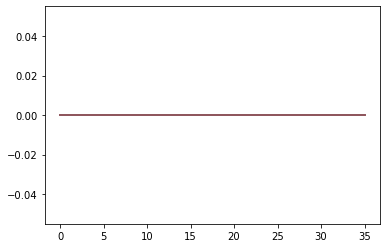

In [312]:
# Graph regret over time
time = np.arange(t)
cum_regret = np.cumsum(regret, axis = 1)
print(np.array(cum_regret))
for i in range(k):
    plt.plot(cum_regret[i])
plt.show()